In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import zipfile
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

from skimage import color, io
from scipy.misc import imresize

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, Activation, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.models import Model

np.random.seed(31337)

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

Using TensorFlow backend.


In [2]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

X_train=np.load('catfish-X_train.npy')
Y_train=np.load('catfish-Y_train.npy')

import gc
gc.collect()


Y_train = np_utils.to_categorical(Y_train, 2)

X_train=preprocess_input(X_train)

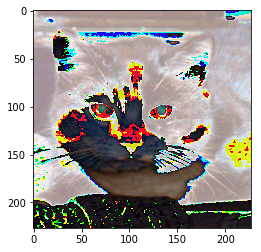

In [3]:
img_no=1231

plt.imshow(X_train[img_no]/255)


In [2]:
import sys
sys.path.append("keras-squeezenet")
from keras.applications.resnet50 import preprocess_input, decode_predictions


from squeezenet import get_squeezenet
from keras.layers import Input, Dense
from keras.models import Model

squeezenet_model = get_squeezenet(1000, dim_ordering='tf')
squeezenet_model.compile(loss="categorical_crossentropy", optimizer="adam")
squeezenet_model.load_weights('keras-squeezenet/model/squeezenet_weights_tf_dim_ordering_tf_kernels.h5', by_name=True)

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

squeezenet_model = Model(input=squeezenet_model.inputs, output=squeezenet_model.layers[61].output)

squeezenet_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 227, 227, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Convolution2D)            (None, 113, 113, 64)  1792        input_1[0][0]                    
____________________________________________________________________________________________________
relu_conv1 (Activation)          (None, 113, 113, 64)  0           conv1[0][0]                      
____________________________________________________________________________________________________
pool1 (MaxPooling2D)             (None, 56, 56, 64)    0           relu_conv1[0][0]                 
___________________________________________________________________________________________

In [5]:
l=squeezenet_model.layers
l=l[61]
print(l.get_config())
print(l.output_shape)


{'output_shape': None, 'output_mask_type': 'raw', 'output_shape_type': 'raw', 'name': 'fire9/concat', 'concat_axis': 3, 'arguments': {}, 'output_mask': None, 'dot_axes': -1, 'mode_type': 'raw', 'mode': 'concat'}
(None, 13, 13, 512)


In [ ]:
train_preds=squeezenet_model.predict(X_train, verbose=0)

print(train_preds.shape)

pickle_file = 'squeezenet_train_preds-86528D.npy'
np.save(pickle_file,train_preds)

statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 0


In [3]:
X_train=''

import gc
gc.collect()

X_test=np.load('catfish-X_test.npy')
#Y_test=np.load('catfish-Y_train.npy')

#Y_test = np_utils.to_categorical(Y_test, 2)

X_test=preprocess_input(X_test)

In [ ]:
train_preds=squeezenet_model.predict(X_test, verbose=0)

pickle_file = 'squeezenet_test_preds-86528D.npy'
np.save(pickle_file,train_preds)


statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

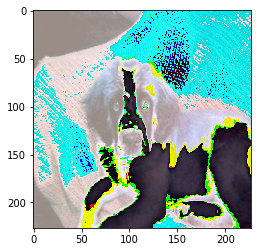

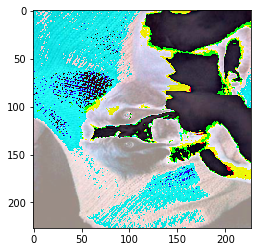

In [4]:
# rotate images

plt.imshow(X_test[1]/255)
plt.show()
X_test=np.rot90(X_test,axes=(1,2))
plt.imshow(X_test[1]/255)
plt.show()

In [5]:

train_preds=squeezenet_model.predict(X_test, verbose=0)

pickle_file = 'squeezenet_test_preds-86528D-rot90.npy'
np.save(pickle_file,train_preds)


statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 4326400096


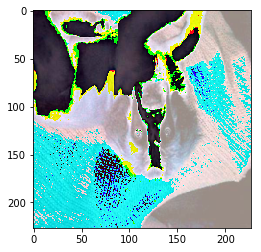

Compressed pickle size: 4326400096


In [9]:
X_test=np.rot90(X_test,axes=(1,2))
plt.imshow(X_test[1]/255)
plt.show()
train_preds=squeezenet_model.predict(X_test, verbose=0)

pickle_file = 'squeezenet_test_preds-86528D-rot180.npy'
np.save(pickle_file,train_preds)


statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

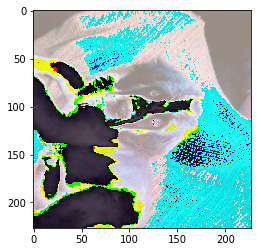

Compressed pickle size: 4326400096


In [10]:
X_test=np.rot90(X_test,axes=(1,2))
plt.imshow(X_test[1]/255)
plt.show()
train_preds=squeezenet_model.predict(X_test, verbose=0)

pickle_file = 'squeezenet_test_preds-86528D-rot270.npy'
np.save(pickle_file,train_preds)


statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

In [11]:
X_hard=np.load('catfish-X_hard.npy')
X_hard=preprocess_input(X_hard)

In [11]:
train_preds=squeezenet_model.predict(X_hard, verbose=0)

print(train_preds.shape)

pickle_file = 'squeezenet_hard_preds-86528D.npy'
np.save(pickle_file,train_preds)
    
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

(1186, 13, 13, 512)
Compressed pickle size: 410488928


In [12]:
X_hard=np.rot90(X_hard,axes=(1,2))
train_preds=squeezenet_model.predict(X_hard, verbose=0)

pickle_file = 'squeezenet_hard_preds-86528D-rot90.npy'
np.save(pickle_file,train_preds)
    
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 410488928


In [13]:
X_hard=np.rot90(X_hard,axes=(1,2))
train_preds=squeezenet_model.predict(X_hard, verbose=0)

pickle_file = 'squeezenet_hard_preds-86528D-rot180.npy'
np.save(pickle_file,train_preds)
    
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 410488928


In [14]:
X_hard=np.rot90(X_hard,axes=(1,2))
train_preds=squeezenet_model.predict(X_hard, verbose=0)

pickle_file = 'squeezenet_hard_preds-86528D-rot270.npy'
np.save(pickle_file,train_preds)
    
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 410488928


In [15]:
ERROR: This is the end. Go to 5.1.1

#X_test_ResNet50=unpickle('ResNet50_test_preds.pickle')
X_test_squeezenet=unpickle('squeezenet_test_preds-86528D.pickle')

Y_test_squeezenet=model_squeezenet.predict(X_test_squeezenet)
Y_test_ResNet50=model_ResNet50.predict(X_test_squeezenet)

SyntaxError: invalid syntax (<ipython-input-15-9451ca8cbeb4>, line 1)

In [163]:
plt.hist(Y_test_ResNet50, bins='auto', log=True) 
plt.title("Aspect ratio Histogram (log scale)")
plt.show()

plt.hist(Y_test_squeezenet, bins='auto', log=True) 
plt.title("Aspect ratio Histogram (log scale)")
plt.show()

NameError: name 'Y_test_ResNet50' is not defined

In [113]:
import re
test_ids=[re.split('/|\.',i)[1] for i in test_images]

In [118]:
Y_test_ResNet50_csv=np.column_stack((test_ids,Y_test_ResNet50))
Y_test_squeezenet_csv=np.column_stack((test_ids,Y_test_squeezenet))


In [120]:
np.savetxt('Y_test_ResNet50.csv',Y_test_ResNet50_csv, fmt="%s,%s", header=("id,label"),comments='')
np.savetxt('Y_test_squeezene.csv',Y_test_squeezenet_csv, fmt="%s,%s", header=("id,label"),comments='')

[ 0.  1.]


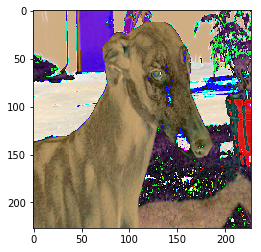

In [160]:
plt.imshow(X_train[2])
print(Y_train[2])